In [ ]:
# Common imports
import os
import imutils
from imutils import paths



In [ ]:
import cv2
import numpy as np
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# to make this notebook's output stable across runs
np.random.seed(42)

## Loading Images

In [ ]:
#os.getcwd()
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = []
labels = []

In [ ]:
image_folder_Path = '/content/drive/MyDrive/1111_Spring 2022/DS-380-A Mayo Clinic Internship/Internship Research/FUNSD - form understanding/DataSET'


In [ ]:
image_folder_Path

'/content/drive/MyDrive/1111_Spring 2022/DS-380-A Mayo Clinic Internship/Internship Research/FUNSD - form understanding/DataSET'

In [ ]:

for image_file_path in imutils.paths.list_images(image_folder_Path):
    image_file = cv2.imread(image_file_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(image_file,(760,1000))
    label = image_file_path.split('/')[9]
    images.append(resized_img)
    labels.append(label)


In [ ]:
pdf_labels_dict = {
    'Q01_unreadable_text': 0,
    'Q02_unclear_text_breaky_sticky': 1,
    'Q03_semi_clear_text': 2,
    'Q04_clear_text': 3,
    'Q05_perfectly_clear_text': 4,
}
numbered_Labels = []
for label in labels:
    label = pdf_labels_dict[label]
    numbered_Labels.append(label)
labels =numbered_Labels

In [ ]:
labels[:20]

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
images[:2]

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[122, 119,   0, ..., 255, 255, 255],
        [122, 119,   0, ..., 255, 255, 255],
        [122, 119,   0, ..., 255, 255, 255],
        ...,
        [122, 119,   0, ..., 255, 255, 255],
        [122, 119,   0, ..., 255, 255, 255],
        [122, 119,   0, ..., 255, 255, 255]], dtype=uint8)]

3

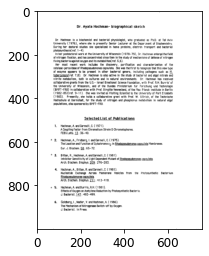

In [ ]:
img = images[200]
plt.imshow(img, cmap = 'gray')
labels[200]

In [ ]:
img.shape

(1000, 760)

In [ ]:
X, y = images, labels

In [ ]:
X = np.array(X)
y = np.array(y)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(243, 1000, 760)

In [ ]:
X_test.shape

(82, 1000, 760)

## Preprocessing: scale images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
X_test_scaled[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

## Training convolutional neural network 

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
num_classes = 5
input_shape=(5, 1000, 760,1)
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
8/8 [==============================] - 21s 759ms/step - loss: 34.7950 - accuracy: 0.2634
Epoch 2/30
8/8 [==============================] - 3s 386ms/step - loss: 2.3006 - accuracy: 0.2922
Epoch 3/30
8/8 [==============================] - 3s 385ms/step - loss: 1.4349 - accuracy: 0.3128
Epoch 4/30
8/8 [==============================] - 3s 382ms/step - loss: 1.2384 - accuracy: 0.4733
Epoch 5/30
8/8 [==============================] - 3s 387ms/step - loss: 1.1057 - accuracy: 0.6049
Epoch 6/30
8/8 [==============================] - 3s 386ms/step - loss: 0.8623 - accuracy: 0.6708
Epoch 7/30
8/8 [==============================] - 3s 387ms/step - loss: 0.7392 - accuracy: 0.7737
Epoch 8/30
8/8 [==============================] - 3s 387ms/step - loss: 0.4151 - accuracy: 0.8889
Epoch 9/30
8/8 [==============================] - 3s 386ms/step - loss: 0.2303 - accuracy: 0.9424
Epoch 10/30
8/8 [==============================] - 3s 387ms/step - loss: 0.1100 - accuracy: 0.9712
Epoch 11/30
8/8 [

In [ ]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 1s 486ms/step - loss: 5.8409 - accuracy: 0.3537


[5.8408613204956055, 0.353658527135849]

### Here we see that while train accuracy is very high (97%), the test accuracy is significantly low (26.83%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [ ]:
predictions = model.predict(X_test_scaled)
predictions[:0]

array([], shape=(0, 5), dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

3

In [ ]:
y_test[0]

4

## Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(1000, 
                                                              760,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

### check on original image

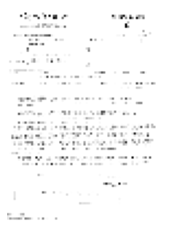

In [ ]:
plt.axis('off')
plt.imshow(X[0], cmap = 'gray')

### Newly generated training sample using data augmentation

TypeError: ignored

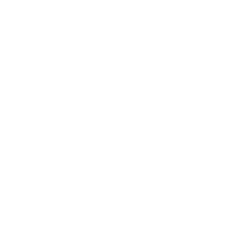

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"), cmap = 'gray')

## Train the model using data augmentation and a drop out layer

In [ ]:
num_classes = 5
input_shape=(5, 1000, 760,1)

model2 = Sequential([
  data_augmentation,

  #Convolutional Network
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=input_shape[1:]),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),

  layers.Conv2D(16, 3, padding='same', activation='relu',),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Dense network
  layers.Flatten(),
  layers.Dense(5000, activation='sigmoid'),
  layers.Dense(500, activation='sigmoid'),
  layers.Dense(50, activation='sigmoid'),
  layers.Dense(num_classes,activation='softmax' )
])

model2.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model2.fit(X_train_scaled, y_train, epochs=500) 

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 4s 400ms/step - loss: 1.7130 - accuracy: 0.1152
Epoch 2/500
8/8 [==============================] - 3s 401ms/step - loss: 1.5277 - accuracy: 0.2510
Epoch 3/500
8/8 [==============================] - 3s 403ms/step - loss: 1.4751 - accuracy: 0.3292
Epoch 4/500
8/8 [==============================] - 3s 401ms/step - loss: 1.4566 - accuracy: 0.3292
Epoch 5/500
8/8 [==============================] - 3s 402ms/step - loss: 1.4444 - accuracy: 0.3292
Epoch 6/500
8/8 [==============================] - 3s 400ms/step - loss: 1.4365 - accuracy: 0.3292
Epoch 7/500
8/8 [==============================] - 3s 404ms/step - loss: 1.4331 - accuracy: 0.3292
Epoch 8/500
8/8 [==============================] - 3s 402ms/step - loss: 1.4320 - accuracy: 0.3292
Epoch 9/500
8/8 [==============================] - 3s 405ms/step - loss: 1.4303 - accuracy: 0.3292
Epoch 10/500
8/8 [==============================] - 3s 403ms/step - loss: 1.4265 - accuracy: 0.3292
Epoch 11/500
8/8 [===

In [ ]:
model2.evaluate(X_test_scaled,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


3/3 [==============================] - 1s 130ms/step - loss: 1.4367 - accuracy: 0.4268


[1.436655879020691, 0.4268292784690857]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model2.predict(X_test_scaled)

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is slightly increased to 34.15%